# 2022 LRT-2 Ridership and Passenger Traffic Analysis

## <font color=blue>Contents</font>
NOTE: The linking of these contents will only work if viewed via Jupyter environment. 
* [Problem](#problem)
* [Plan](#plan)
* [Data Wrangling](#wrangling)
* [Analysis](#analysis)
* [Insights](#insights)
* [For Further Study](#further)

TIP: If you want to easily return to the Contents above from anywhere in this Notebook, press CTRL + Home. 

## <font color=blue>Problem</font> <a class="anchor" id="problem"></a>

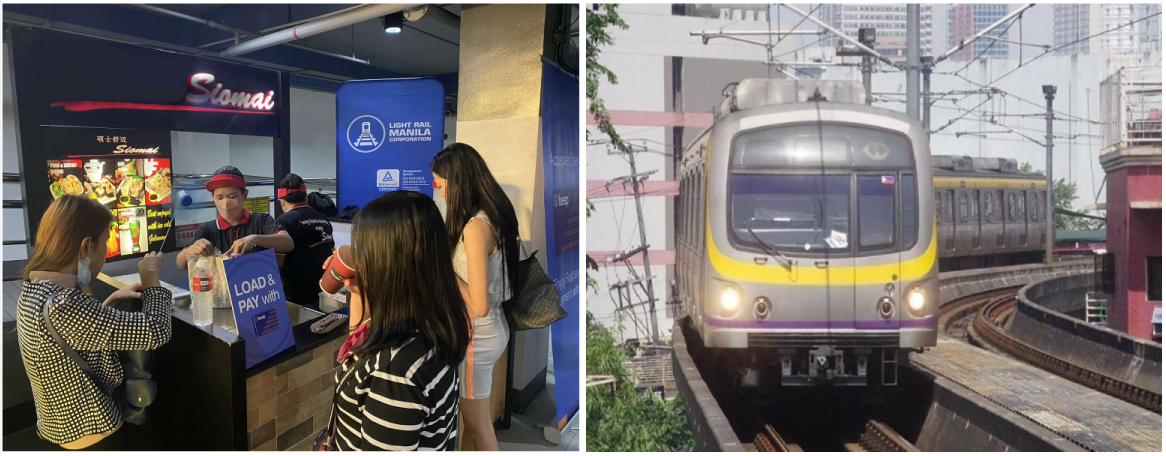
<center>(c) Light Rail Transit Authority</center>
<center>Left: A siomai kiosk in one of the LRT-1 stations, Right: An LRT-2 train.</center>

I am a regular passenger of Light Rail Transit (LRT) trains here in Metro Manila. I observe that there are business kiosks near the station's entrance and exit areas. This made me wonder: __if I would franchise a siomai-rice* business (for example), which offers instant food for our hurrying commuters, in what LRT-2 station should I place it?__ In other words, what LRT-2 station has the highest passenger traffic? <br>

As a curious passenger, I also like to know what day is the most hectic (i.e. highest passenger traffic) and least hectic (i.e. lowest passenger traffic). These are only two of the six questions I explored in this analysis. The six questions are given below and all of them try to extract LRT-2-related business and transportation insights using its daily ridership data in 2022. <br>

1. Is there a trend for LRT-2 ridership as a function of the months?
2. How can we describe the annual passenger traffic (entry + exit) for each station? 
3. Which station has the highest daily passenger traffic on average?
4. What is the average daily ridership of LRT-2, and what day has the highest ridership on average?
5. In what station do passengers of LRT-2 tend to enter?
6. In what station do passengers of LRT-2 tend to exit?

*I have eaten too many siomai (a variant of Chinese dumplings) before or after my train rides since college.

## <font color=blue>Plan</font> <a class="anchor" id="plan"></a>


Since LRT Authority is owned by the government, my plan is to get LRT-2 data from the Freedom of Information (FOI) website. Due to the long waiting time before one can get the data upon their requests (with a possibility of being unsuccessful after the wait), I am going to use the available 2022 LRT-2 data that another person already requested. (The conversation between the FOI officer and the citizen is public.) The ridership data goes from January 1 2022 to Dec 31 2022. These are significantly enough to answer our problem. Unfortunately, the daily ridership data for each month of 2022 are in PDF format. I have to convert the twelve PDF files into twelve Excel files before doing the data wrangling below. 

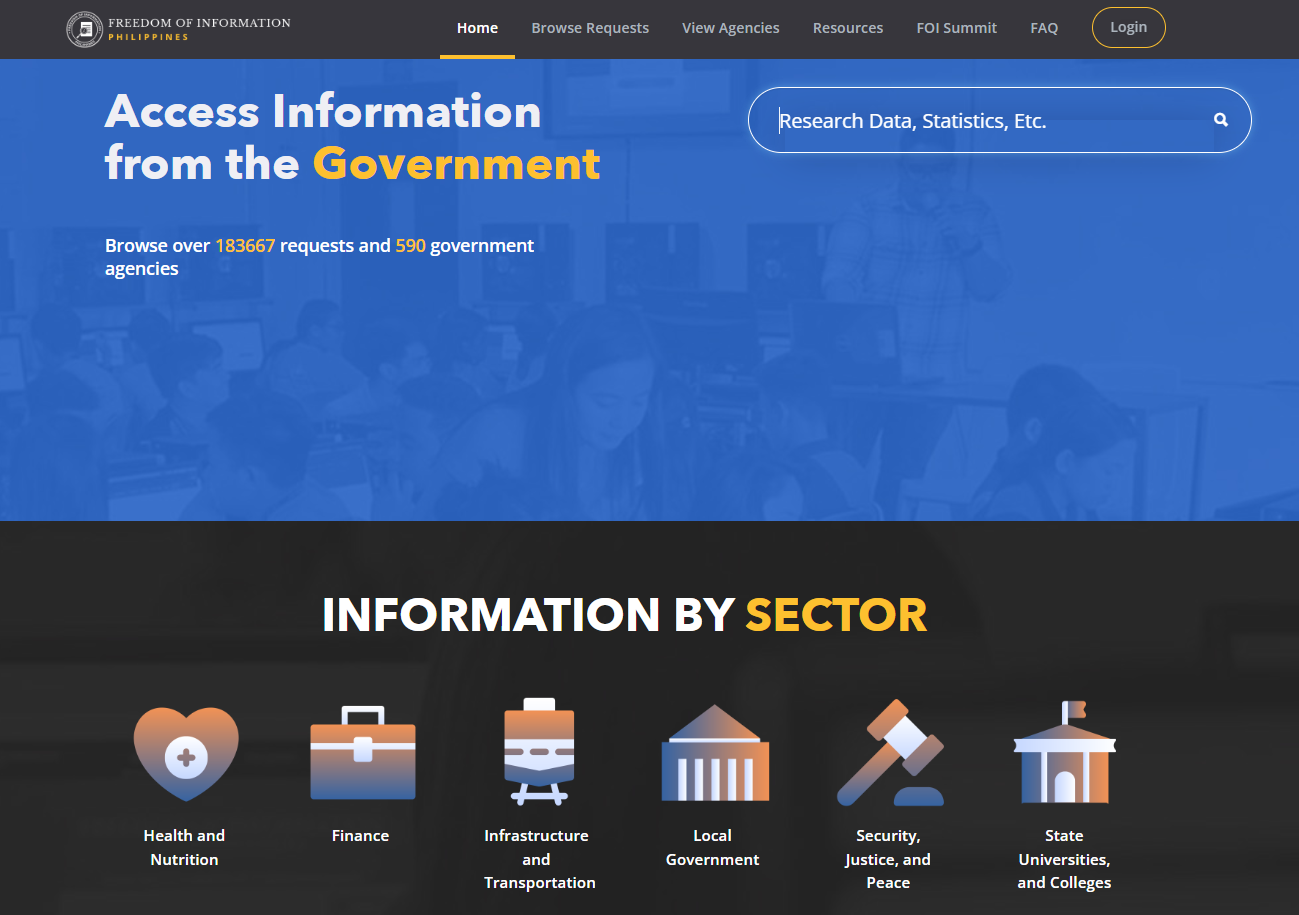

## <font color=blue>Data Wrangling</font> <a class="anchor" id="wrangling"></a>

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Make a function to get the necessary data for Excel files 1 to 7

In [2]:
def get_df_excel_1to7(filename):
    # Note: Unlike Excel files 1 to 7, files 8-12 do not contain the whole data table into just one worksheet
    
    df = pd.read_excel(filename, sheet_name=0, 
                  header=4, usecols=list(range(0, 28))
                      )

    # Return only dataframe up to the 31st row. Minimize unnecessary info. 
    return df.iloc[: 32]

### Make a function to format the dataframes for Excel files 1 to 7

In [3]:
def format_df_1to7(df):
    # Rename all column names
    headers = ['Date', 
           'Day', 
           'Recto_Entry', 
           'Recto_Exit',
           'Legarda_Entry', 
           'Legarda_Exit', 
           'Pureza_Entry', 
           'Pureza_Exit', 
           'VMapa_Entry', 
           'VMapa_Exit', 
           'JRuiz_Entry', 
           'JRuiz_Exit',
           'Gilmore_Entry',
           'Gilmore_Exit', 
           'BettyGo_Entry', 
           'BettyGo_Exit', 
           'Araneta_Entry',
           'Araneta_Exit',
           'Anonas_Entry',
           'Anonas_Exit',
           'Katipunan_Entry',
           'Katipunan_Exit',
           'Santolan_Entry',
           'Santolan_Exit',
           'Marikina_Entry',
           'Marikina_Exit',
           'Antipolo_Entry',
           'Antipolo_Exit'] 

    df.columns = headers
    
    # Format entry and exit values into integers
    transformed_columns = df.iloc[:, 2:28].astype(int)
    
    date_day_columns = df.iloc[:, 0:2]
    
    # Combine first two columns with the remaining integer columns
    df_merged = pd.concat([date_day_columns, transformed_columns], axis=1)
    
    return df_merged 

### Get dataframes for the first 7 months

In [4]:
## For January
# Call first function and get only the row up to the last day of the month
excel1 = '01 Line_2_Ridership_Report_Entry_&_ExitTrafficPerStn_JAN2022Official.xlsx'
df_excel1 = get_df_excel_1to7(excel1).iloc[:31]

# Call second function and assign result to df_jan
df_january = format_df_1to7(df_excel1)

# Show last 5 rows of the dataframe
df_january.tail()

,Date,Day,Recto_Entry,Recto_Exit,Legarda_Entry,Legarda_Exit,Pureza_Entry,Pureza_Exit,VMapa_Entry,VMapa_Exit,...,Anonas_Entry,Anonas_Exit,Katipunan_Entry,Katipunan_Exit,Santolan_Entry,Santolan_Exit,Marikina_Entry,Marikina_Exit,Antipolo_Entry,Antipolo_Exit
26,27-Jan,Thu,11442,11669,1263,1446,2032,1916,2004,1968,...,1944,1946,2978,1713,1657,1639,3140,3215,5159,4520
27,28-Jan,Fri,12820,12989,1405,1492,2345,2084,2312,2118,...,2189,2165,3325,1993,1771,1820,3456,3581,5711,5176
28,29-Jan,Sat,11016,10669,1045,1132,1890,1622,2036,1813,...,1683,1536,2743,1686,1652,1615,3065,3149,4671,5327
29,30-Jan,Sun,7471,8724,752,708,1276,1055,1467,1305,...,1107,1120,2006,1172,1289,1196,2147,2120,3757,3206
30,31-Jan,Mon,13635,14165,1478,1624,2300,2220,2280,2204,...,2138,2240,3539,2045,1908,1890,3842,3904,7023,5570


In [5]:
# For February

excel2 = '02 Line_2_Ridership_Report_Entry_&_ExitTrafficPerStn_FEB2022_Official.xlsx'
df_excel2 = get_df_excel_1to7(excel2).iloc[:28]
df_february = format_df_1to7(df_excel2)
df_february.tail()

,Date,Day,Recto_Entry,Recto_Exit,Legarda_Entry,Legarda_Exit,Pureza_Entry,Pureza_Exit,VMapa_Entry,VMapa_Exit,...,Anonas_Entry,Anonas_Exit,Katipunan_Entry,Katipunan_Exit,Santolan_Entry,Santolan_Exit,Marikina_Entry,Marikina_Exit,Antipolo_Entry,Antipolo_Exit
23,24-Feb,Thu,15495,15480,2093,2143,3142,2955,2932,2670,...,2847,2715,4284,2403,2361,2264,4701,4791,7417,6988
24,25-Feb,Fri,14330,14552,1298,1244,2415,2025,2415,2216,...,2033,1920,3585,2149,2030,2065,3933,3929,6530,5906
25,26-Feb,Sat,13847,13504,1408,1508,2405,2067,2603,2407,...,2187,1970,3500,2176,2178,2056,4189,4134,6650,7271
26,27-Feb,Sun,11962,12255,1111,1191,1854,1702,2157,2190,...,1578,1503,2800,1868,1746,1816,3357,3339,6014,4889
27,28-Feb,Mon,17015,18077,2116,2342,3178,2984,2942,2960,...,2839,2935,4392,2695,2631,2470,5362,5131,9271,7108


In [6]:
# For March

excel3 = '03 Line_2_Ridership_Report_Entry_&_ExitTrafficPerStn_MAR2022(Official).xlsx'

df_excel3 = get_df_excel_1to7(excel3).iloc[:31]
df_march = format_df_1to7(df_excel3)
df_march.tail()

,Date,Day,Recto_Entry,Recto_Exit,Legarda_Entry,Legarda_Exit,Pureza_Entry,Pureza_Exit,VMapa_Entry,VMapa_Exit,...,Anonas_Entry,Anonas_Exit,Katipunan_Entry,Katipunan_Exit,Santolan_Entry,Santolan_Exit,Marikina_Entry,Marikina_Exit,Antipolo_Entry,Antipolo_Exit
26,27-Mar,Sun,14045,14321,1711,1610,2300,2080,2620,2576,...,2015,2087,3361,2141,2099,2125,4203,4166,7071,6122
27,28-Mar,Mon,18305,19485,2251,2669,3436,3278,3216,3147,...,3332,3463,5047,3039,2908,2824,6324,5988,10858,8721
28,29-Mar,Tue,17484,17909,2263,2537,3341,3165,3284,3147,...,3319,3359,4755,2868,2583,2685,5850,5858,9440,7913
29,30-Mar,Wed,17906,17952,2392,2673,3641,3342,3553,3295,...,3441,3594,4868,2968,2709,2746,5903,6000,9236,8253
30,31-Mar,Thu,17750,17982,2416,2708,3549,3241,3451,3272,...,3348,3534,4822,3015,2699,2714,5791,5850,9438,8166


In [7]:
# For April

excel4 = '04 Line_2_Ridership_Report_Entry_&_ExitTrafficPerStn_APR2022Official.xlsx'

df_excel4 = get_df_excel_1to7(excel4).iloc[:30]

# Delete null values when LRT2 was opened because of Holy Week
df_excel4.drop(list(range(12,17)), inplace=True)
df_april = format_df_1to7(df_excel4)
df_april.tail()

,Date,Day,Recto_Entry,Recto_Exit,Legarda_Entry,Legarda_Exit,Pureza_Entry,Pureza_Exit,VMapa_Entry,VMapa_Exit,...,Anonas_Entry,Anonas_Exit,Katipunan_Entry,Katipunan_Exit,Santolan_Entry,Santolan_Exit,Marikina_Entry,Marikina_Exit,Antipolo_Entry,Antipolo_Exit
25,26-Apr,Tue,18591,18391,2461,2719,3558,3365,3548,3275,...,3563,3715,5002,3066,2719,2719,6313,6346,10038,8691
26,27-Apr,Wed,18888,19315,2650,2965,3838,3518,3824,3631,...,4006,4145,5355,3308,2851,2825,6503,6559,10296,8996
27,28-Apr,Thu,18900,18862,2784,2968,3835,3548,3664,3567,...,3758,3961,5128,3189,2815,2821,6513,6436,10214,8826
28,29-Apr,Fri,20464,20333,2801,2834,3890,3479,4197,3860,...,3858,4050,5613,3465,3263,2978,6944,6886,10441,9358
29,30-Apr,Sat,18263,17686,2136,2107,3295,2833,3815,3437,...,3102,2950,4760,3008,3097,3092,6366,6146,9402,10541


In [8]:
# For May

excel5 = '05 Line2_Ridership_Report_Entry_&_ExitTrafficPerStn_MAY2022Official.xlsx'

df_excel5 = get_df_excel_1to7(excel5).iloc[:31]
df_may = format_df_1to7(df_excel5)
df_may.tail()

,Date,Day,Recto_Entry,Recto_Exit,Legarda_Entry,Legarda_Exit,Pureza_Entry,Pureza_Exit,VMapa_Entry,VMapa_Exit,...,Anonas_Entry,Anonas_Exit,Katipunan_Entry,Katipunan_Exit,Santolan_Entry,Santolan_Exit,Marikina_Entry,Marikina_Exit,Antipolo_Entry,Antipolo_Exit
26,27-May,Fri,22383,22161,3096,3181,4357,4010,4385,4190,...,4556,4823,6063,3713,3378,3371,7880,7898,12405,10874
27,28-May,Sat,18893,17834,2266,2209,3369,2844,4016,3667,...,3538,3330,5087,3119,3017,3103,6408,6722,10205,11020
28,29-May,Sun,17927,18279,1948,1921,2607,2415,3120,3228,...,2924,2755,4345,2837,2663,2587,5622,5386,10013,8304
29,30-May,Mon,22097,22670,3188,3580,4210,4307,4325,4303,...,4415,4749,5975,3658,3383,3353,8366,7891,14183,10735
30,31-May,Tue,20336,20521,3077,3349,4118,3858,4084,3922,...,4428,4661,5780,3490,3200,3127,7638,7464,12322,10428


In [9]:
# For June

excel6 = '06 Line2_Ridership_Report_Entry_&_ExitTrafficPerStn_JUNE2022Official.xlsx'

df_excel6 = get_df_excel_1to7(excel6).iloc[:30]
df_june = format_df_1to7(df_excel6)
df_june.tail()

,Date,Day,Recto_Entry,Recto_Exit,Legarda_Entry,Legarda_Exit,Pureza_Entry,Pureza_Exit,VMapa_Entry,VMapa_Exit,...,Anonas_Entry,Anonas_Exit,Katipunan_Entry,Katipunan_Exit,Santolan_Entry,Santolan_Exit,Marikina_Entry,Marikina_Exit,Antipolo_Entry,Antipolo_Exit
25,26-Jun,Sun,18115,18499,2194,2308,2898,2709,3260,3245,...,2901,2788,4537,3054,2847,2838,6453,6094,9903,7923
26,27-Jun,Mon,23366,23649,3714,4119,4541,4571,4550,4592,...,5037,5491,6575,4126,3729,3528,9414,8845,15095,11268
27,28-Jun,Tue,21987,22270,3694,4021,4594,4620,4762,4519,...,5033,5305,6492,3991,3455,3402,8479,8254,13434,11171
28,29-Jun,Wed,22077,21793,3655,3820,4574,4627,4827,4599,...,5232,5395,6374,4195,3376,3381,8467,8504,13237,11356
29,30-Jun,Thu,16964,17318,2421,2473,3915,3763,4234,4373,...,4834,4835,5175,3442,3049,2918,7046,6823,11632,9869


In [10]:
# For July

excel7 = '07 Line2_Ridership_Report_Entry_&_ExitTrafficPerStn_JULY_2022Official.xlsx'

df_excel7 = get_df_excel_1to7(excel7).iloc[:31]
df_july = format_df_1to7(df_excel7)
df_july.tail()

,Date,Day,Recto_Entry,Recto_Exit,Legarda_Entry,Legarda_Exit,Pureza_Entry,Pureza_Exit,VMapa_Entry,VMapa_Exit,...,Anonas_Entry,Anonas_Exit,Katipunan_Entry,Katipunan_Exit,Santolan_Entry,Santolan_Exit,Marikina_Entry,Marikina_Exit,Antipolo_Entry,Antipolo_Exit
26,27-Jul,Wed,15716,14476,2830,2863,3310,3513,4507,4940,...,4087,4177,5077,3241,2682,2856,6825,7436,9938,9202
27,28-Jul,Thu,23052,22946,4964,5401,4696,4603,5015,4789,...,5370,5487,6742,4271,3604,3565,9113,9187,13610,11351
28,29-Jul,Fri,25913,25649,5119,5291,5018,4736,5336,5063,...,5736,5729,7476,4599,3864,3836,10056,9984,14806,12516
29,30-Jul,Sat,19640,18576,2993,2862,3783,3294,4466,4138,...,3842,3529,5211,3265,2973,3088,6989,7371,10671,11061
30,31-Jul,Sun,570,629,90,87,128,206,3868,5734,...,1785,1982,2224,1075,2304,1445,4701,3790,7311,4299


### Make a function to get data for Excel files 8 to 11

In [11]:
def get_df_excel_8to11(filename):
    
    df_table1 = pd.read_excel(filename, sheet_name=0, 
                  header=4, usecols=list(range(0, 16))
                   )
    df_table2 = pd.read_excel(filename, sheet_name=1, 
                  header=4, usecols=list(range(2, 14))
                   )
    df = pd.concat([df_table1, df_table2], axis=1)
    
    return df.iloc[:32]

### Make a function to format the dataframes for Excel files 8 to 11

In [12]:
def format_df_8to11(df):
    # Rename all column names
    headers = ['Date', 
           'Day', 
           'Recto_Entry', 
           'Recto_Exit',
           'Legarda_Entry', 
           'Legarda_Exit', 
           'Pureza_Entry', 
           'Pureza_Exit', 
           'VMapa_Entry', 
           'VMapa_Exit', 
           'JRuiz_Entry', 
           'JRuiz_Exit',
           'Gilmore_Entry',
           'Gilmore_Exit', 
           'BettyGo_Entry', 
           'BettyGo_Exit', 
           'Araneta_Entry',
           'Araneta_Exit',
           'Anonas_Entry',
           'Anonas_Exit',
           'Katipunan_Entry',
           'Katipunan_Exit',
           'Santolan_Entry',
           'Santolan_Exit',
           'Marikina_Entry',
           'Marikina_Exit',
           'Antipolo_Entry',
           'Antipolo_Exit'] 

    df.columns = headers
    
    # Format entry and exit values into integers
    transformed_columns = df.iloc[:, 2:28].astype(int)
    
    date_day_columns = df.iloc[:, 0:2]
    
    # Combine first two columns with the remaining integer columns
    df_merged = pd.concat([date_day_columns, transformed_columns], axis=1)
    
    return df_merged

### Get dataframes for August til November

In [13]:
# For August
excel8 = '08 L2_Ridership_Report_Entry_&_ExitTrafficPerStn_AUG2022Official.xlsx'

df_excel8 = get_df_excel_8to11(excel8).iloc[:31]
df_august = format_df_8to11(df_excel8)
df_august.tail()

,Date,Day,Recto_Entry,Recto_Exit,Legarda_Entry,Legarda_Exit,Pureza_Entry,Pureza_Exit,VMapa_Entry,VMapa_Exit,...,Anonas_Entry,Anonas_Exit,Katipunan_Entry,Katipunan_Exit,Santolan_Entry,Santolan_Exit,Marikina_Entry,Marikina_Exit,Antipolo_Entry,Antipolo_Exit
26,27-Aug,Sat,24170,23304,5288,4499,4100,3482,5197,4718,...,4769,4649,6750,4325,3747,3632,9401,9723,12637,12689
27,28-Aug,Sun,17866,17795,2621,2589,2832,2543,3723,3672,...,3055,2834,4764,3202,2584,2553,6151,6199,9678,8381
28,29-Aug,Mon,17722,18406,2451,3291,2859,2869,3505,3873,...,3288,3305,4657,3004,2630,2468,7030,6144,11664,7971
29,30-Aug,Tue,27240,27849,6804,7517,5152,5346,5737,5736,...,6450,6854,8269,5216,4222,4115,11654,11160,16733,12762
30,31-Aug,Wed,26305,26188,7857,8110,5114,4970,5540,5476,...,6431,6799,8187,5274,4152,3919,10972,10901,15267,12495


In [14]:
# For September

excel9 = '09_L2_Ridership_Report_Entry_&_ExitTrafficPerStn_SEPT2022Official.xlsx'

df_excel9 = get_df_excel_8to11(excel9).iloc[:30]
df_september = format_df_8to11(df_excel9)
df_september.tail()

,Date,Day,Recto_Entry,Recto_Exit,Legarda_Entry,Legarda_Exit,Pureza_Entry,Pureza_Exit,VMapa_Entry,VMapa_Exit,...,Anonas_Entry,Anonas_Exit,Katipunan_Entry,Katipunan_Exit,Santolan_Entry,Santolan_Exit,Marikina_Entry,Marikina_Exit,Antipolo_Entry,Antipolo_Exit
25,26-Sep,Mon,15124,15478,1722,2467,2565,2692,3154,3386,...,2990,3236,3792,2511,2079,1973,6055,5117,10754,7103
26,27-Sep,Tue,28153,29007,7788,8415,5104,5274,5861,5882,...,6620,7153,8839,5692,4374,4287,12507,11970,17639,13559
27,28-Sep,Wed,28449,28382,9002,9026,5435,5522,6179,6141,...,6757,7127,8849,5784,4398,4285,12340,12091,16441,13750
28,29-Sep,Thu,27621,27727,8799,8611,5417,5423,6064,5992,...,6486,6920,8686,5678,4155,4150,12027,11759,16307,13414
29,30-Sep,Fri,31156,30957,9514,9069,6165,5757,6690,6491,...,7213,7636,9768,6469,4602,4586,13050,12970,17844,15290


In [15]:
# For October

excel10 = '10 Line2_Ridership_Report_Entry_&_ExitTrafficPerStn_OCTOBER2022Official.xlsx'

df_excel10 = get_df_excel_8to11(excel10).iloc[:31]
df_excel10.iloc[:, :28]
df_october = format_df_8to11(df_excel10)
df_october.tail()

,Date,Day,Recto_Entry,Recto_Exit,Legarda_Entry,Legarda_Exit,Pureza_Entry,Pureza_Exit,VMapa_Entry,VMapa_Exit,...,Anonas_Entry,Anonas_Exit,Katipunan_Entry,Katipunan_Exit,Santolan_Entry,Santolan_Exit,Marikina_Entry,Marikina_Exit,Antipolo_Entry,Antipolo_Exit
26,27-Oct,Thu,29670,30070,10354,9798,6558,6914,7069,6944,...,7998,8566,9606,6520,4851,4822,14058,13425,18365,14796
27,28-Oct,Fri,32342,31946,10231,9583,7700,7277,7916,7443,...,8481,8944,10399,6908,5614,5150,14601,14299,19420,16567
28,29-Oct,Sat,14089,13119,2647,2104,3022,2583,3867,3323,...,2683,2836,4257,2689,2236,2244,5185,5751,8574,9003
29,30-Oct,Sun,14690,14467,2142,1785,2830,2303,3433,3355,...,2678,2652,4066,2658,2321,2283,5521,5347,8867,7623
30,31-Oct,Mon,16473,16320,2051,1952,2937,2597,3804,3614,...,2836,2958,3697,2823,2846,2507,7107,6388,10941,8658


In [16]:
# For November

excel11 = '11 Line2_Ridership_Report_Entry_&_ExitTrafficPerStn_NOV_2022Official.xlsx'

df_excel11 = get_df_excel_8to11(excel11).iloc[:30]
df_november = format_df_8to11(df_excel11)
df_november.tail()

,Date,Day,Recto_Entry,Recto_Exit,Legarda_Entry,Legarda_Exit,Pureza_Entry,Pureza_Exit,VMapa_Entry,VMapa_Exit,...,Anonas_Entry,Anonas_Exit,Katipunan_Entry,Katipunan_Exit,Santolan_Entry,Santolan_Exit,Marikina_Entry,Marikina_Exit,Antipolo_Entry,Antipolo_Exit
25,26-Nov,Sat,29972,29015,6586,5982,5662,4755,6523,6068,...,6363,6068,9167,5690,4729,4612,12692,12432,16787,16626
26,27-Nov,Sun,22287,23039,3253,3526,3588,3271,4476,4510,...,3878,3793,5982,4065,3370,3448,8840,8233,12964,10361
27,28-Nov,Mon,30551,31457,9404,10256,5943,6062,6518,6762,...,7464,8476,9509,6449,5182,4844,14787,13326,21270,14743
28,29-Nov,Tue,32147,32260,10071,10264,6172,5883,7448,7098,...,8399,8926,9861,6666,5267,5146,14793,14182,19908,16365
29,30-Nov,Wed,26706,27126,4568,4291,4494,4116,5335,5811,...,4896,4901,6876,4657,3804,3770,10264,9312,14374,11722


### Lastly, process the December Excel file, which differs in structure

In [17]:
# For December

filename = '12 L2_Ridership_Report_Entry_&_ExitTrafficPerStn_DEC2022Official.xlsx'

# Get the necessary data
df_table1 = pd.read_excel(filename, sheet_name=1,
                  header=1, usecols=list(range(0, 16)))
df_table2 = pd.read_excel(filename, sheet_name=2,
                  header=1, usecols=list(range(2, 14)))

df_merged = pd.concat([df_table1, df_table2], axis=1)
df = df_merged.iloc[:31]
df_december = format_df_8to11(df)
df_december.tail()

,Date,Day,Recto_Entry,Recto_Exit,Legarda_Entry,Legarda_Exit,Pureza_Entry,Pureza_Exit,VMapa_Entry,VMapa_Exit,...,Anonas_Entry,Anonas_Exit,Katipunan_Entry,Katipunan_Exit,Santolan_Entry,Santolan_Exit,Marikina_Entry,Marikina_Exit,Antipolo_Entry,Antipolo_Exit
26,27-Dec,Wed,27249,28050,2560,2982,4166,4051,5494,5428,...,5354,5806,7292,4781,4437,4480,12547,11407,19739,15030
27,28-Dec,Thu,25851,26382,2638,2881,4246,4105,5382,5254,...,5298,5585,7003,4400,4247,4274,11542,10853,17646,14099
28,29-Dec,Fri,24844,25058,2714,2830,4297,3842,5466,5129,...,5266,5389,6795,4475,4125,4022,11340,10603,17064,14058
29,30-Dec,Sat,24576,25276,1821,1772,3454,2738,4306,3996,...,3878,3931,5793,3967,3688,3765,9774,9340,15466,12861
30,31-Dec,Sun,10786,9952,978,791,1953,1531,2786,2283,...,1731,1853,2523,1820,1906,1729,4001,4114,7025,7036


### Adding a month column for each monthly dataframe

In [18]:
df_january.insert(loc=1, column='Month', value=1)

In [19]:
df_february.insert(loc=1, column='Month', value=2)
df_march.insert(loc=1, column='Month', value=3)
df_april.insert(loc=1, column='Month', value=4)
df_may.insert(loc=1, column='Month', value=5)
df_june.insert(loc=1, column='Month', value=6)
df_july.insert(loc=1, column='Month', value=7)
df_august.insert(loc=1, column='Month', value=8)
df_september.insert(loc=1, column='Month', value=9)
df_october.insert(loc=1, column='Month', value=10)
df_november.insert(loc=1, column='Month', value=11)
df_december.insert(loc=1, column='Month', value=12)

### Combining all 12 dataframes into one giant dataframe

In [20]:
df_LRT2 = pd.concat([df_january, df_february, df_march,
                         df_april, df_may, df_june, df_july,
                         df_august, df_september, df_october,
                         df_november, df_december], axis=0, ignore_index=True)

In [21]:
df_LRT2.tail()

,Date,Month,Day,Recto_Entry,Recto_Exit,Legarda_Entry,Legarda_Exit,Pureza_Entry,Pureza_Exit,VMapa_Entry,...,Anonas_Entry,Anonas_Exit,Katipunan_Entry,Katipunan_Exit,Santolan_Entry,Santolan_Exit,Marikina_Entry,Marikina_Exit,Antipolo_Entry,Antipolo_Exit
355,27-Dec,12,Wed,27249,28050,2560,2982,4166,4051,5494,...,5354,5806,7292,4781,4437,4480,12547,11407,19739,15030
356,28-Dec,12,Thu,25851,26382,2638,2881,4246,4105,5382,...,5298,5585,7003,4400,4247,4274,11542,10853,17646,14099
357,29-Dec,12,Fri,24844,25058,2714,2830,4297,3842,5466,...,5266,5389,6795,4475,4125,4022,11340,10603,17064,14058
358,30-Dec,12,Sat,24576,25276,1821,1772,3454,2738,4306,...,3878,3931,5793,3967,3688,3765,9774,9340,15466,12861
359,31-Dec,12,Sun,10786,9952,978,791,1953,1531,2786,...,1731,1853,2523,1820,1906,1729,4001,4114,7025,7036


### Add a 'Daily Ridership' column as the last column

__NOTE__: Ridership is defined as  the number of persons who ride a public transportation. In our case, it's the number of persons who use LRT-2 train. In the context of our data, one person has one entry, rides the train, then one exit. To get the ridership, we total the entries and exits per day, then divide it by 2. 

In [22]:
df_LRT2['Daily Ridership'] = ((df_LRT2.iloc[:, 3:29].sum(axis=1))/2).round().astype(int)
df_LRT2.head()

,Date,Month,Day,Recto_Entry,Recto_Exit,Legarda_Entry,Legarda_Exit,Pureza_Entry,Pureza_Exit,VMapa_Entry,...,Anonas_Exit,Katipunan_Entry,Katipunan_Exit,Santolan_Entry,Santolan_Exit,Marikina_Entry,Marikina_Exit,Antipolo_Entry,Antipolo_Exit,Daily Ridership
0,1-Jan,1,Sat,7923,7934,503,573,1179,1059,1375,...,727,1621,1132,1363,1489,2310,2176,4590,4023,26286
1,2-Jan,1,Sun,12361,13815,679,857,1489,1548,1718,...,1235,2850,1783,2059,1999,3478,3436,7112,4974,40702
2,3-Jan,1,Mon,12655,13438,1179,1452,2073,2124,2107,...,2059,3129,1883,1881,1926,3737,3686,7112,5293,45750
3,4-Jan,1,Tue,10345,11402,1061,1204,1869,1816,1869,...,1827,2729,1604,1677,1715,3125,3121,5527,4369,38898
4,5-Jan,1,Wed,10039,10248,979,1134,1753,1720,1793,...,1715,2549,1515,1429,1505,2756,2825,4746,4153,36193


### Check our main dataframe

In [23]:
df_LRT2.tail()

,Date,Month,Day,Recto_Entry,Recto_Exit,Legarda_Entry,Legarda_Exit,Pureza_Entry,Pureza_Exit,VMapa_Entry,...,Anonas_Exit,Katipunan_Entry,Katipunan_Exit,Santolan_Entry,Santolan_Exit,Marikina_Entry,Marikina_Exit,Antipolo_Entry,Antipolo_Exit,Daily Ridership
355,27-Dec,12,Wed,27249,28050,2560,2982,4166,4051,5494,...,5806,7292,4781,4437,4480,12547,11407,19739,15030,113204
356,28-Dec,12,Thu,25851,26382,2638,2881,4246,4105,5382,...,5585,7003,4400,4247,4274,11542,10853,17646,14099,108950
357,29-Dec,12,Fri,24844,25058,2714,2830,4297,3842,5466,...,5389,6795,4475,4125,4022,11340,10603,17064,14058,105246
358,30-Dec,12,Sat,24576,25276,1821,1772,3454,2738,4306,...,3931,5793,3967,3688,3765,9774,9340,15466,12861,90617
359,31-Dec,12,Sun,10786,9952,978,791,1953,1531,2786,...,1853,2523,1820,1906,1729,4001,4114,7025,7036,42716


In [24]:
df_LRT2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             360 non-null    object
 1   Month            360 non-null    int64 
 2   Day              360 non-null    object
 3   Recto_Entry      360 non-null    int32 
 4   Recto_Exit       360 non-null    int32 
 5   Legarda_Entry    360 non-null    int32 
 6   Legarda_Exit     360 non-null    int32 
 7   Pureza_Entry     360 non-null    int32 
 8   Pureza_Exit      360 non-null    int32 
 9   VMapa_Entry      360 non-null    int32 
 10  VMapa_Exit       360 non-null    int32 
 11  JRuiz_Entry      360 non-null    int32 
 12  JRuiz_Exit       360 non-null    int32 
 13  Gilmore_Entry    360 non-null    int32 
 14  Gilmore_Exit     360 non-null    int32 
 15  BettyGo_Entry    360 non-null    int32 
 16  BettyGo_Exit     360 non-null    int32 
 17  Araneta_Entry    360 non-null    in

__NOTE__: An entry to the station is counted by tapping the Beep card or single-journey ticket. After the train ride, the next tap/insert of the card/ticket counts as exit. 

## <font color=blue>Analysis</font> <a class="anchor" id="analysis"></a>

What do we want to study? 
1. Is there a trend for LRT-2 ridership as a function of the months?
2. How can we describe the annual passenger traffic (entry + exit) for each station? 
3. Which station has the highest daily passenger traffic on average?
4. What is the average daily ridership of LRT-2, and what day has the highest ridership on average?
5. In what station do passengers of LRT-2 tend to enter?
6. In what station do passengers of LRT-2 tend to exit?

### 1. Is there a trend for LRT-2 ridership as a function of the months?

In [25]:
# Get necessary data
ridership_per_month = df_LRT2.groupby('Month')[['Daily Ridership']].sum().reset_index()
ridership_per_month 

,Month,Daily Ridership
0,1,1078769
1,2,1416793
2,3,1951512
3,4,1767517
4,5,2341462
5,6,2625688
6,7,2785519
7,8,3134361
8,9,3309995
9,10,3647229


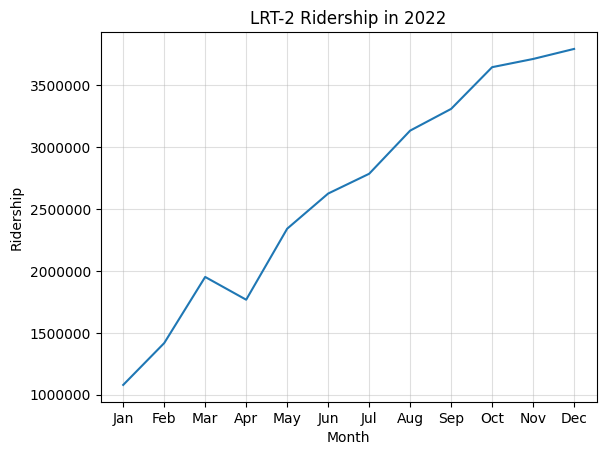

In [26]:
# Plot the x and y values
ridership_per_month.plot(kind='line', x='Month', y='Daily Ridership', legend=False)

# Titles and axes labels
plt.title('LRT-2 Ridership in 2022')
plt.ylabel('Ridership')
plt.xlabel('Month')

# Ensure the y ticks are not exponential
plt.ticklabel_format(style='plain', axis='y')

# Show grid with transparency of 40%
plt.grid(alpha=0.4)

# Change the x ticks to the names of the months
months_list = ['Jan', 'Feb', 'Mar', 'Apr', 
               'May', 'Jun', 'Jul', 'Aug', 'Sep', 
               'Oct', 'Nov', 'Dec']
plt.xticks(ticks=ridership_per_month['Month'], labels=months_list)

# Call the graph
plt.show()

### 2. How can we describe the annual passenger traffic (entry + exit) for each station?

We cannot use the term "ridership" for one station. Because a passenger enters in a station, but exits from a _different_ station. Rather, we are interested to the number of passengers who enter and exit a given station. Let's call this __passenger traffic__, which is the sum of entry and exit counts for a given station. 

In [27]:
# Get necessary data

recto_entry_to_antipolo_exit = df_LRT2.iloc[:, 3:29].sum(axis=0).tolist()
recto_entry_to_antipolo_exit 

[7630896,
 7680777,
 1517317,
 1561349,
 1443999,
 1370480,
 1595611,
 1553741,
 542825,
 514165,
 1126915,
 1229793,
 421454,
 424972,
 4940399,
 6274162,
 1623405,
 1672452,
 2190047,
 1414961,
 1194990,
 1170868,
 2985492,
 2901480,
 4424706,
 3727005]

In [28]:
# Check index positions 
for i in range(len(recto_entry_to_antipolo_exit)):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [29]:
# Get the yearly ridership per station (entry + exit)

traffic_per_station = []
for i in range(len(recto_entry_to_antipolo_exit)):
    if i % 2 == 0:
        station_value = recto_entry_to_antipolo_exit[i] + recto_entry_to_antipolo_exit[i+1]
        traffic_per_station.append(station_value)
    
    if i % 2 != 0:
        continue

traffic_per_station

[15311673,
 3078666,
 2814479,
 3149352,
 1056990,
 2356708,
 846426,
 11214561,
 3295857,
 3605008,
 2365858,
 5886972,
 8151711]

In [30]:
# Finally, create a dataframe for yearly traffic per station

station_names = ['Recto', 'Legarda', 'Pureza', 'VMapa', 'JRuiz', 
                 'Gilmore', 'BettyGo', 'Araneta', 'Anonas', 'Katipunan',
                'Santolan', 'Marikina', 'Antipolo'] 

yearly_traffic = pd.DataFrame({'Station': station_names, 'Yearly Traffic': traffic_per_station})

yearly_traffic

,Station,Yearly Traffic
0,Recto,15311673
1,Legarda,3078666
2,Pureza,2814479
3,VMapa,3149352
4,JRuiz,1056990
5,Gilmore,2356708
6,BettyGo,846426
7,Araneta,11214561
8,Anonas,3295857
9,Katipunan,3605008


In [31]:
yearly_traffic['Yearly Traffic'].sum()

63134261

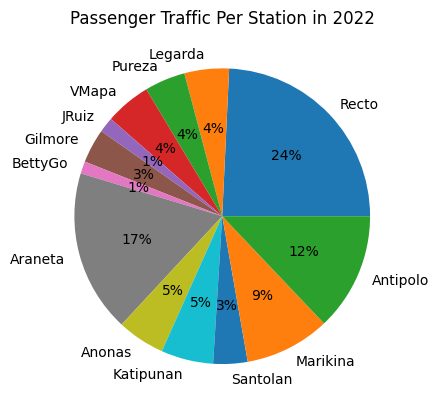

In [32]:
# Plot the pie graph

yearly_traffic['Yearly Traffic'].plot(kind='pie', 
                                   labels=yearly_traffic['Station'], autopct='%d%%')

plt.title('Passenger Traffic Per Station in 2022')

plt.ylabel(None)

plt.show()

### 3. Which station has the highest daily passenger traffic on average?

In [33]:
# Check how many days
df_LRT2.tail()

,Date,Month,Day,Recto_Entry,Recto_Exit,Legarda_Entry,Legarda_Exit,Pureza_Entry,Pureza_Exit,VMapa_Entry,...,Anonas_Exit,Katipunan_Entry,Katipunan_Exit,Santolan_Entry,Santolan_Exit,Marikina_Entry,Marikina_Exit,Antipolo_Entry,Antipolo_Exit,Daily Ridership
355,27-Dec,12,Wed,27249,28050,2560,2982,4166,4051,5494,...,5806,7292,4781,4437,4480,12547,11407,19739,15030,113204
356,28-Dec,12,Thu,25851,26382,2638,2881,4246,4105,5382,...,5585,7003,4400,4247,4274,11542,10853,17646,14099,108950
357,29-Dec,12,Fri,24844,25058,2714,2830,4297,3842,5466,...,5389,6795,4475,4125,4022,11340,10603,17064,14058,105246
358,30-Dec,12,Sat,24576,25276,1821,1772,3454,2738,4306,...,3931,5793,3967,3688,3765,9774,9340,15466,12861,90617
359,31-Dec,12,Sun,10786,9952,978,791,1953,1531,2786,...,1853,2523,1820,1906,1729,4001,4114,7025,7036,42716


In [34]:
## Use yearly_traffic dataframe

# Add a column for the daily average
yearly_traffic['Ave Daily Traffic'] = (yearly_traffic['Yearly Traffic']/360).round().astype(int)
yearly_traffic

,Station,Yearly Traffic,Ave Daily Traffic
0,Recto,15311673,42532
1,Legarda,3078666,8552
2,Pureza,2814479,7818
3,VMapa,3149352,8748
4,JRuiz,1056990,2936
5,Gilmore,2356708,6546
6,BettyGo,846426,2351
7,Araneta,11214561,31152
8,Anonas,3295857,9155
9,Katipunan,3605008,10014


In [35]:
# Get a descending dataframe based on daily average
pareto_data = pd.concat([yearly_traffic[['Station']], yearly_traffic[['Ave Daily Traffic']]], axis=1)
pareto_data.set_index('Station', drop=True, inplace=True)
pareto_data.sort_values(by='Ave Daily Traffic', ascending=False, inplace=True)
pareto_data

,Ave Daily Traffic
Station,
Recto,42532
Araneta,31152
Antipolo,22644
Marikina,16353
Katipunan,10014
Anonas,9155
VMapa,8748
Legarda,8552
Pureza,7818


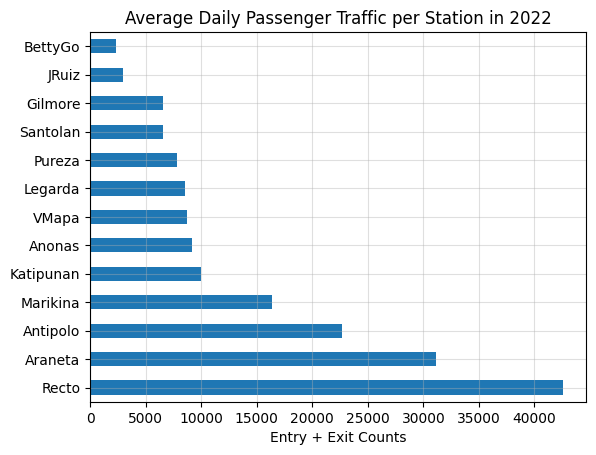

In [62]:
# Plot the horizontal bar graph

pareto_data.plot(kind='barh', legend=False)

plt.title('Average Daily Passenger Traffic per Station in 2022')
plt.xlabel('Entry + Exit Counts')
plt.ylabel(None)
plt.grid(alpha=0.4)

plt.show()

### 4. What is the average daily ridership of LRT-2, and what day has the highest ridership on average?

In [37]:
# Get average daily ridership

ave_daily_ridership = df_LRT2['Daily Ridership'].mean().round().astype(int)
ave_daily_ridership

87686

In [38]:
# Get necessary data
grouped_by_day = df_LRT2.groupby('Day')[['Daily Ridership']].mean()
grouped_by_day.rename(columns={'Daily Ridership': 'Ave Ridership'}, inplace=True)
grouped_by_day = grouped_by_day.reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
grouped_by_day

,Ave Ridership
Day,
Mon,89328.980769
Tue,90997.730769
Wed,93374.960784
Thu,93756.500000
Fri,100528.588235
Sat,83731.519231
Sun,62676.807692


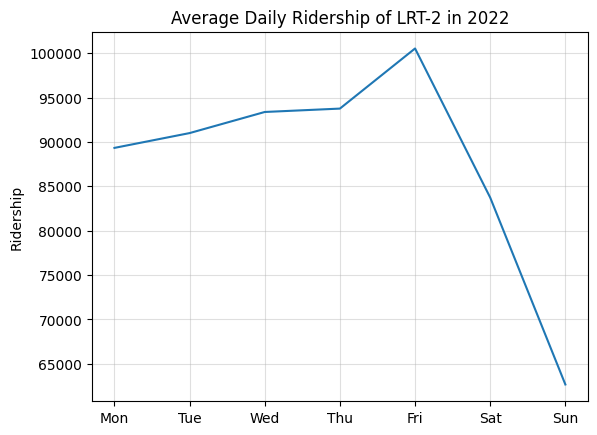

In [63]:
# Plot the line graph

grouped_by_day.plot(kind='line', y='Ave Ridership', legend=False)

plt.title('Average Daily Ridership of LRT-2 in 2022')
plt.xlabel(None)
plt.ylabel('Ridership')
plt.grid(alpha=0.4)

plt.show()

### 5. In what station do passengers of LRT-2 tend to enter?

In [52]:
# Get necessary data
LRT2_entries = df_LRT2[['Recto_Entry', 'Legarda_Entry', 'Pureza_Entry', 'VMapa_Entry',
        'JRuiz_Entry', 'Gilmore_Entry', 'BettyGo_Entry', 'Araneta_Entry',
        'Anonas_Entry', 'Katipunan_Entry', 'Santolan_Entry', 'Marikina_Entry',
        'Antipolo_Entry']]

LRT2_entries.tail()

,Recto_Entry,Legarda_Entry,Pureza_Entry,VMapa_Entry,JRuiz_Entry,Gilmore_Entry,BettyGo_Entry,Araneta_Entry,Anonas_Entry,Katipunan_Entry,Santolan_Entry,Marikina_Entry,Antipolo_Entry
355,27249,2560,4166,5494,1794,3240,1410,18167,5354,7292,4437,12547,19739
356,25851,2638,4246,5382,1912,3235,1370,18790,5298,7003,4247,11542,17646
357,24844,2714,4297,5466,1716,3042,1341,17455,5266,6795,4125,11340,17064
358,24576,1821,3454,4306,1368,1837,877,14317,3878,5793,3688,9774,15466
359,10786,978,1953,2786,719,921,439,7475,1731,2523,1906,4001,7025


In [54]:
# Get a sorted dataframe based on the average entries
ave_entries = LRT2_entries.mean(axis=0).round().astype(int).to_frame()
ave_entries.columns = ['Daily Average']
pareto_entries = ave_entries.sort_values(by='Daily Average', ascending=False)
pareto_entries

,Daily Average
Recto_Entry,21197
Araneta_Entry,13723
Antipolo_Entry,12291
Marikina_Entry,8293
Katipunan_Entry,6083
Anonas_Entry,4509
VMapa_Entry,4432
Legarda_Entry,4215
Pureza_Entry,4011
Santolan_Entry,3319


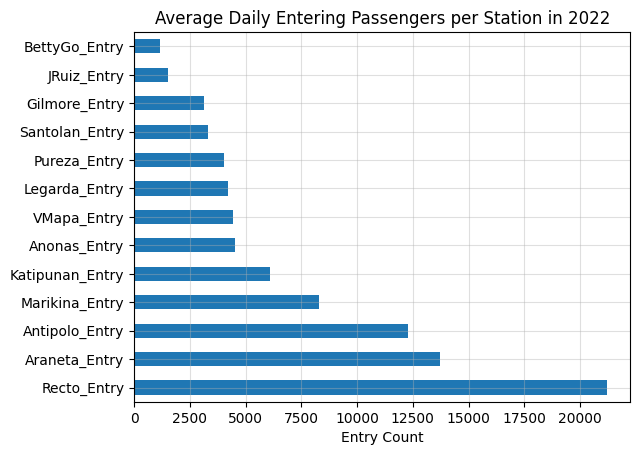

In [64]:
# Plot the horizontal bar graph

pareto_entries.plot(kind='barh', legend=False)

plt.title('Average Daily Entering Passengers per Station in 2022')
plt.xlabel('Entry Count')

plt.grid(alpha=0.4)

plt.show()

### 6. In what station do passengers of LRT-2 tend to exit?

In [56]:
LRT2_exits = df_LRT2[['Recto_Exit', 'Legarda_Exit', 'Pureza_Exit', 'VMapa_Exit',
        'JRuiz_Exit', 'Gilmore_Exit', 'BettyGo_Exit', 'Araneta_Exit',
        'Anonas_Exit', 'Katipunan_Exit', 'Santolan_Exit', 'Marikina_Exit',
        'Antipolo_Exit']]

LRT2_exits.tail()

,Recto_Exit,Legarda_Exit,Pureza_Exit,VMapa_Exit,JRuiz_Exit,Gilmore_Exit,BettyGo_Exit,Araneta_Exit,Anonas_Exit,Katipunan_Exit,Santolan_Exit,Marikina_Exit,Antipolo_Exit
355,28050,2982,4051,5428,1810,3751,1478,23904,5806,4781,4480,11407,15030
356,26382,2881,4105,5254,1781,3647,1493,23987,5585,4400,4274,10853,14099
357,25058,2830,3842,5129,1625,3525,1348,23122,5389,4475,4022,10603,14058
358,25276,1772,2738,3996,1084,2283,867,18199,3931,3967,3765,9340,12861
359,9952,791,1531,2283,645,1121,402,8913,1853,1820,1729,4114,7036


In [57]:
# Get a sorted dataframe based on the average exits
ave_exits = LRT2_exits.mean(axis=0).round().astype(int).to_frame()
ave_exits.columns = ['Daily Average']
pareto_exits = ave_exits.sort_values(by='Daily Average', ascending=False)
pareto_exits

,Daily Average
Recto_Exit,21335
Araneta_Exit,17428
Antipolo_Exit,10353
Marikina_Exit,8060
Anonas_Exit,4646
Legarda_Exit,4337
VMapa_Exit,4316
Katipunan_Exit,3930
Pureza_Exit,3807
Gilmore_Exit,3416


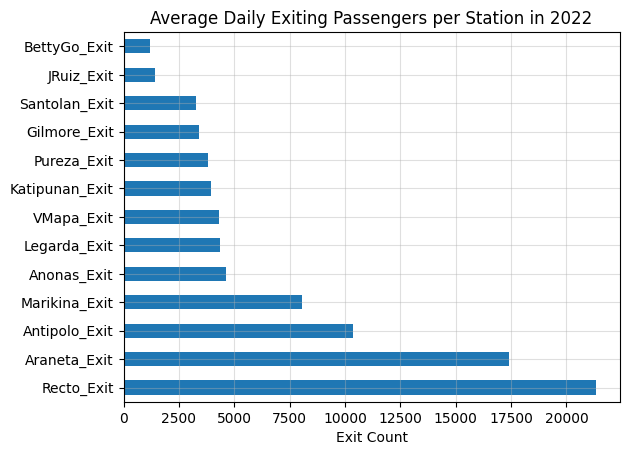

In [65]:
# Plot the horizontal bar graph

pareto_exits.plot(kind='barh', legend=False)

plt.title('Average Daily Exiting Passengers per Station in 2022')
plt.xlabel('Exit Count')

plt.grid(alpha=0.4)

plt.show()

## <font color=blue>Insights</font> <a class="anchor" id="insights"></a>

The Light Rail Transit (LRT) Authority already published their 2022 accomplishment report. However, it only mentions their __annual__ ridership, revenue, and other performance metrics. Our goal is to identify other opportunities for insights, such as those that are relevant down to the level of days and LRT-2 stations to answer our main problem. To maximize our analysis, we have six questions to explore: 

1. Is there a trend for LRT-2 ridership as a function of the months?
2. How can we describe the annual passenger traffic (entry + exit) for each station? 
3. Which station has the highest daily passenger traffic on average?
4. What is the average daily ridership of LRT-2, and what day has the highest ridership on average?
5. In what station do passengers of LRT-2 tend to enter?
6. In what station do passengers of LRT-2 tend to exit?

### 1. Is there a trend for LRT-2 ridership as a function of the months?

In [44]:
# Check the total ridership of LRT-2 in 2022
df_LRT2['Daily Ridership'].sum()

31567128

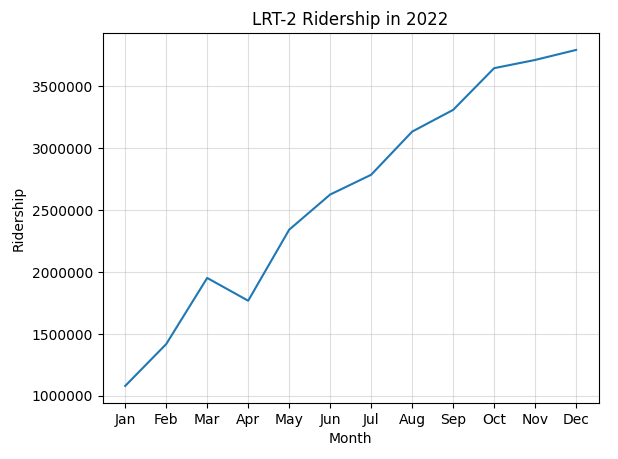

Ridership of LRT-2 in 2022 continually increased from January to December. There was a slight decline from March to April. This was expected as LRT-2 was closed during the Holy Week (April 13 to April 17). <br> 

Authorities began the quarantine protocols in March 2020, in a bet to combat the Covid-19 pandemic. Businesses consequently suffered due to this economic downturn. __The increasing trend of LRT-2 ridership was probably due to the return of businesses to operate at full capacity by the beginning of March 2022__. Health officials also eased pandemic restrictions to encourage economic recovery.[1] <br>

According to the 2021 accomplishment report of the LRT Authority, the total passengers in 2020 was 12.5 millions. The figure decreased to 11.84 millions in 2021.[2]  __Based on our data, we have a total of 31.57 millions ridership in 2022, a reversal with an increase of about 167% from 2021__. It is nice to see that our value is very close to their 2022 accomplishment report, which mentions a total of 31.64 millions.[3] This gives us the confidence to think that our source data and our data wrangling are reasonably accurate.  

[1] https://www.nbcnews.com/news/world/philippines-lifts-pandemic-restrictions-rcna18073 <br>
[2] https://www.lrta.gov.ph/wp-content/uploads/2022/03/Accomplishment-Report-2021.pdf <br>
[3] https://www.lrta.gov.ph/wp-content/uploads/2023/04/Accomplishment-Report-2022.pdf

### 2. How can we describe the annual passenger traffic (entry + exit) for each station? 

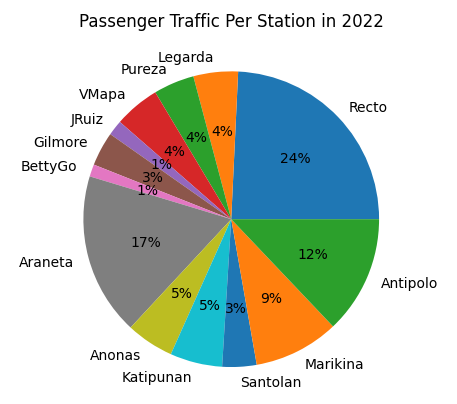

In [52]:
yearly_traffic[['Station', 'Yearly Traffic']].sort_values(by='Yearly Traffic', ascending=False)

,Station,Yearly Traffic
0,Recto,15311673
7,Araneta,11214561
12,Antipolo,8151711
11,Marikina,5886972
9,Katipunan,3605008
8,Anonas,3295857
3,VMapa,3149352
1,Legarda,3078666
2,Pureza,2814479
10,Santolan,2365858


The pie chart shows us the snapshot of the passenger traffic, which is the sum of entries and exits, per station. In 2022, the top 3 LRT-2 stations in terms of passenger traffic are __Recto__ (15.31 millions), __Araneta__ (11.21 millions), and __Antipolo__ (8.15 millions). The 3 stations with the least passenger traffic are Gilmore (2.35 millions), JRuiz (1.06 millions) and BettyGo (0.85 millions). 

### 3. Which station has the highest daily passenger traffic on average?

I consider this question the most interesting out of the six. If I am going to franchise a business stand apt for commuters (say, a siomai rice kiosk) in the adjacent hallway, mall, or even just below the station, I would like to know which station has the highest passenger traffic. 

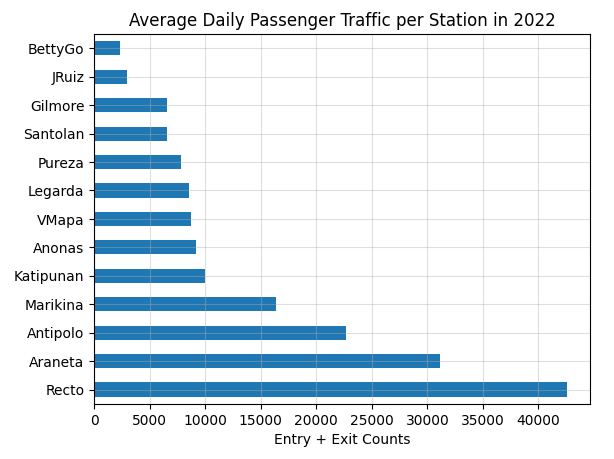

Based on our analysis, the station with the highest average daily passenger traffic is Recto, followed by Araneta and Antipolo. It is worth noting that these 3 stations are higher than the 3 stations with the least traffic by significant margin. __It seems that Recto is the best choice for our small business stand__, especially if the products/services are within the budget of a typical LRT-2 commuter. 

### 4. What is the average daily ridership of LRT-2, and what day has the highest ridership on average?

I consider this question the next most interesting, because the answer gives me the profile of "daily hecticness" in commuting via LRT-2. 

As it was calculated in the previous analysis, the average daily ridership is 87,686. In other words, __about 88 thousands people use LRT-2 everyday for transportation__. Now, comparing the average ridership from Monday to Sunday, the graph below shows that Friday has the most passengers while Sunday has the least passengers.

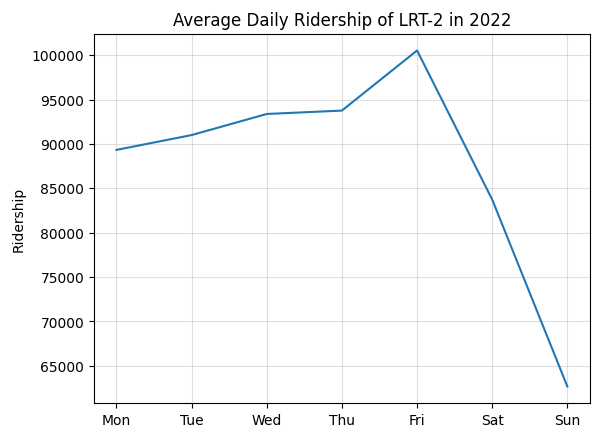

The result is logical. People are at home during weekends. Hence, the average number passengers is high during the weekdays. Notably, __Friday has the highest average ridership__.  

### 5-6. In what station do passengers of LRT-2 tend to enter? In what station do passengers of LRT-2 tend to exit?

Because our source data have counts for entries and exits for each station, we can inquire the overall behavior of LRT-2 commuters as they use it to go to their destinations. 

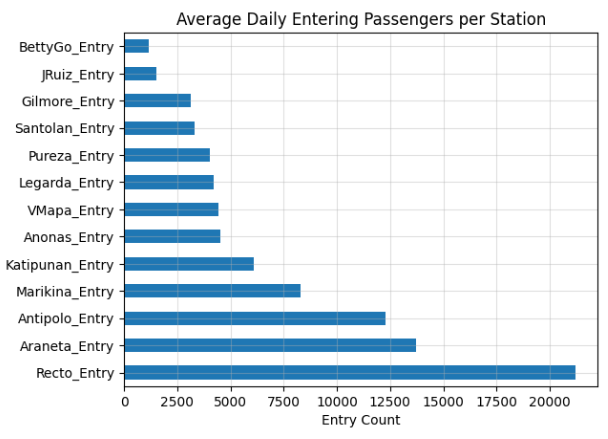
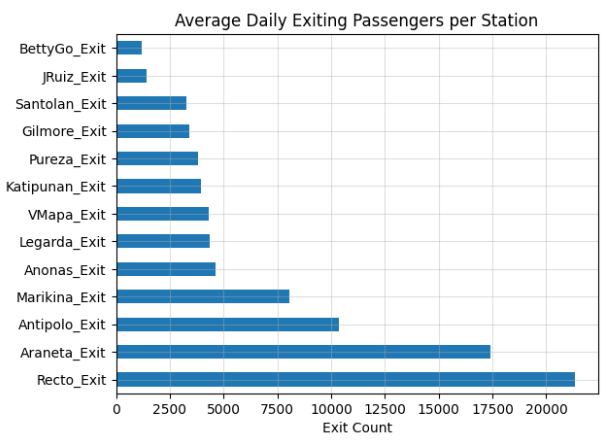

We can see that most commuters come from the Recto station. Most of them exit from the Recto station as well. This is quiet logical. A commuter living near Recto station who uses LRT-2 to go to school or work is certain to return at Recto hours later (which will count as exit by then). But if a person enters via Recto, where is their destination for school/work? It is definitely not Recto. Referring to horizontal bar graphs above, the most likely answer is either Araneta or Antipolo station. That's why the top 3 stations for entering ridership are also the top 3 stations for exiting. __A commuter living near Recto, Araneta, or Antipolo station who rides the train in the morning will definitely go back to Recto, Araneta, or Antipolo station later at dusk/night.__ 

## <font color=blue>For Further Study</font> <a class="anchor" id="further"></a>

1. Do the daily LRT-2 data from other years give the same insights? For the years 2020 and 2021, there was probably a difference due to the Covid-19 pandemic. But how about years before the pandemic? Also, how about this year 2023? Will it follow our 2022 insights since both of them were "technically" post-pandemic? 
2. To make our decision more accurate about the LRT-2 location of our business kiosk, it would be beneficial if we also have the data for the passengers' basic demographics (sex, age, student or not, worker or not). For example, if we assume that male students tend to avail of siomai, then we just have to determine which station has the highest traffic for male students. As of this writing, the LRT Authority does not have the capacity to collect this demographic information.